# Recommender system for movies
The drastic growth in the amount of available digital information and the number of people who browse the Internet have created a potential challenge of information overload which hinders timely access to items of interest on the Internet. Information retrieval systems, such as Google, DevilFinder and Altavista have partially solved this problem but prioritization and personalization which involves direct mapping of available content to the user's interest/preferences is not taken into consideration. To illustrate a movie house, the manager knows personal preferences/interests of customers. His or her high quality recommendations about very interesting movie that many people have watched makes the customers want to see such movies. This recommendation can inturn make them satisfied and might increase profits. In the case of online movie application, personal recommendations can be generated intelligently by a recommender system.


A recommender system is a technology that deal with the problem of information overload on items such as products, movies, events, articles by filtering out vital information fragment out of a heap of dynamically generated information based on users (customers, visitors, app users, readers) preferences, interest, or observed atitude about the item.  Recommender systems have the ability to predict whether a particular user would prefer an item or not based on the extracted information on the user’s profile. Recommender systems have greater advantages to both service providers and users. 

Therefore, the need to use efficient and accurate recommendation techniques within a system that will provide relevant and dependable recommendations for users is not debatable.

To start with, I will not be jumping straight into fitting the model without demonstrating a few analytics on the movielens dataset in this notebook. I will show insights on what movies are most similar to a selected movie by a user.



In [1]:
import numpy as np
import pandas as pd

## Obtain and display the data

In [2]:
# get data from csv file
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
# print a snapshot of first 10 rows
df.head(10)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
5,22,377,1,878887116
6,244,51,2,880606923
7,166,346,1,886397596
8,298,474,4,884182806
9,115,265,2,881171488


In [4]:
# create a dataframe for movie titles
movie_titles = pd.read_csv("Movie_Id_Titles")


In [5]:
# Print first 10 rows of movie title dataframe¶
movie_titles.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [6]:
# Merge movie_titles dataframe on item_id of the data
df = pd.merge(df,movie_titles,on='item_id')

In [7]:
# Print first 10 rows of movie title dataframe after merge
df.head(10)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


## Get some insight from the dataset

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### Get the mean of all ratings grouped by the title and sort based on first five rows with best ratings

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

#### Get the count of all ratings grouped by the title and sort based on first five rows with the highest number of ratings

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(5)

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

#### Snapshot of an index based off of the movie title and rating values

In [11]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head(5)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


#### Snapshot of number of ratings and average ratings with a movie_title index

In [12]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head(5)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


#### The plot indicates most of the number of ratings are few. It is obvious that most movies have zero or one rating. So those movies that are popular shows large number of reviews.

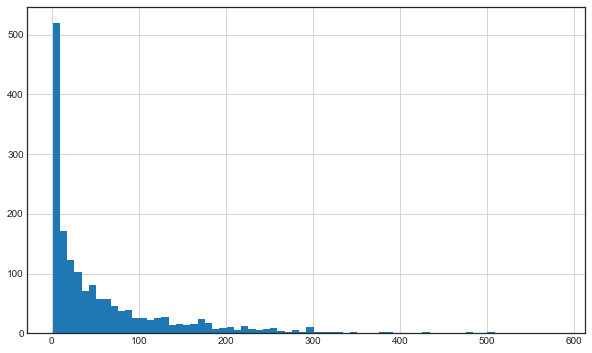

In [13]:
# plot histogram to visualize number of ratings
plt.figure(figsize=(10,6))
ratings['num of ratings'].hist(bins=70)

#### This plot shows some peaks at the whole number such as 1, 2,3,4,5 probably this movies have only one person watching them. The plot also shows a kind of high distribution of movies especially around the three stars ratings. There is an outlier of one star rating which indicates a really bad movie and five star rating which indicates an interesting movie 

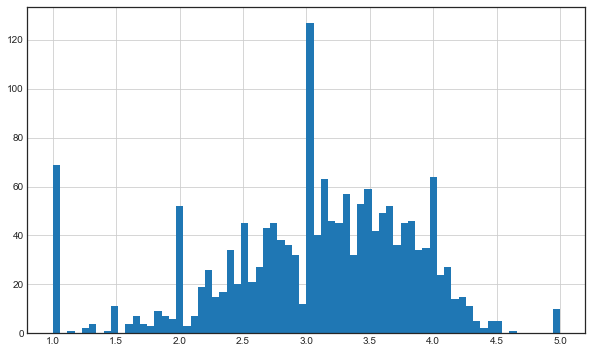

In [14]:
# plot histogram to visualize ratings
plt.figure(figsize=(10,6))
ratings['rating'].hist(bins=70)

#### This scatter plot shows that rating is directly proportional to the number of ratings(higher the rating the higher the number of ratings). One and two ratings have a lower number of ratings while three to five ratings have a higher number of ratings. Lower ratings have small number of ratings while higher rating have higher number of ratings.

/Users/AkandeImisioluwa/anaconda3/envs/news/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


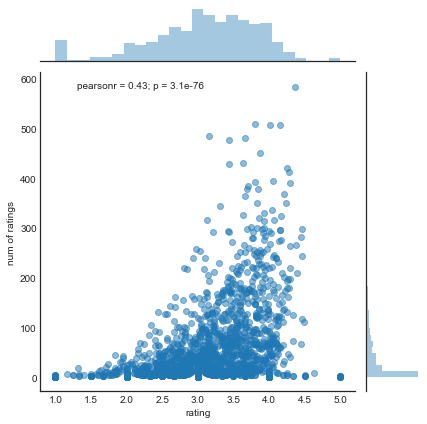

In [15]:
# scatter plot for number of ratings vs ratings
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# Movie recommender
Now, I want to check what movies are most similar to a selected movie by a user.


#### Create a matrix that takes user_id on one axis and the title on the other axis. Each cell contains the ratings given by each user to the movie

In [16]:
moviematrix = df.pivot_table(index='user_id',columns='title',values='rating')
moviematrix.head(5)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Print 10 most rated movies

In [17]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


#### Grab user rating for two movies and display the user ratings for fargo movie

In [18]:
fargo_user_ratings = moviematrix['Fargo (1996)']
scream_user_ratings = moviematrix['Scream (1996)']
fargo_user_ratings.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Fargo (1996), dtype: float64

#### Obtain the correlation between two pandas series(the user ratings on all movies and user ratings on fargo/scream movies)

In [19]:
similar_to_fargo = moviematrix.corrwith(fargo_user_ratings)
similar_to_scream = moviematrix.corrwith(scream_user_ratings)


/Users/AkandeImisioluwa/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/AkandeImisioluwa/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


#### Replace series with dataframe, drop missing values off scream dataframe and print a snapshot of fargo movie dataframe

In [20]:
corr_fargo = pd.DataFrame(similar_to_fargo,columns=['Correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo.head(5)

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


#### Print movies that have correlated ratings with fargo movie

In [21]:
corr_fargo.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
King of the Hill (1993),1.0
Open Season (1996),1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
"Journey of August King, The (1995)",1.0
Nowhere (1997),1.0
"Wedding Gift, The (1994)",1.0
"Convent, The (Convento, O) (1995)",1.0
Captives (1994),1.0
City of Industry (1997),1.0


#### Add number of ratings column to the fargo data frame and take a snapshot

In [22]:
corr_fargo = corr_fargo.join(ratings['num of ratings'])
corr_fargo.head(5)

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


#### Now I want to filter out movies with less than 100 ratings in order to see movies with similar ratings of above 100 for fargo movie

In [23]:
corr_fargo[corr_fargo['num of ratings']>100].sort_values('Correlation',ascending=False).head(5)

,Correlation,num of ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173


#### Replace series with dataframe, drop missing values off scream dataframe and print a snapshot of scream movie dataframe

In [24]:
corr_scream = pd.DataFrame(similar_to_scream,columns=['Correlation'])
corr_scream.dropna(inplace=True)
scream_user_ratings.head(5)

user_id
0    NaN
1    NaN
2    3.0
3    2.0
4    4.0
Name: Scream (1996), dtype: float64

#### Print movies that have correlated ratings with scream movie


In [25]:
corr_scream.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Love and Death on Long Island (1997),1.0
Turbo: A Power Rangers Movie (1997),1.0
Scream (1996),1.0
Caro Diario (Dear Diary) (1994),1.0
Time Tracers (1995),1.0
8 Seconds (1994),1.0
Safe Passage (1994),1.0
"Scarlet Letter, The (1926)",1.0
Maya Lin: A Strong Clear Vision (1994),1.0


#### Add number of ratings column to the fargo data frame and take a snapshot

In [26]:
corr_scream = corr_scream.join(ratings['num of ratings'])
df.head(5)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


#### Now I want to filter out movies with less than 100 ratings in order to see movies with similar ratings of above 100 for scream movie

In [27]:
corr_scream[corr_scream['num of ratings']>100].sort_values('Correlation',ascending=False).head(5)

,Correlation,num of ratings
title,,
Scream (1996),1.000000,478
Scream 2 (1997),0.706028,106
Seven (Se7en) (1995),0.435188,236
Starship Troopers (1997),0.419322,211
"Nightmare on Elm Street, A (1984)",0.410796,111


#### Print number of unique users and movies

In [28]:
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

print('Number of Users: '+ str(n_users))
print('Number of Movies: '+str(n_items))

Number of Users: 944
Number of Movies: 1682


# Recommendation system

## Methodology
Two most common types of recommender systems are **Content-Based** and **Collaborative Filtering (CF)**. 
* **Content-Based**: This are systems that recommend items similar to those a given user has liked in the past, regardless of the preferences of other users. They focus on the attributes of the items and give recommendations based on the similarity between them. This systems do not care about user preferences or interest. 

Generally speaking, there are two types of feedback:


a. Explicit feedback: This type of feedback is intentionally provided by users in form of clicking the “like or dislike” and rating an item by number of stars. In several cases, it is difficult to obtain explicit feedback data, simply because many users shy away from this approach. Instead of clicking on either Like or Dislike most users navigate to another page.

b. Implicit feedback: This includes data such as “user viewed an item”, "user saved an item", “user finished reading the article” or “user ordered a product”. This kind of data are often much easier to collect. Probably because the user is not aware about such activity or it actually cost them less efforts. But this approach can help us to compute good recommendations. 

From business perspective, I think it is always better to recommend recent items for a succesful operation of a business. In movie industry for instance, It is more beneficial if they have an automated system that recommend movies that are similar to recent movies liked by a user rather than old movies. Because Content Based method is concerned with the past interactions of a given user and do not take other users into consideration; this makes the system less recommended.

* **Collaborative filtering**: This are systems that recommend items based on the knowledge of users attitude to items. The system actually make use of the "wisdom of the crowd" to recommend items.

## Collaborative Filtering

In general, Collaborative filtering is more popularly used than content-based systems because it usually gives better results and is relatively simple in terms of implementation. The algorithm has the ability to learn for itself what features to use. 

Collaborative Filtering can be subdivided into **Memory-Based Collaborative Filtering** and **Model-Based Collaborative filtering**. 

I will implement Model-Based CF by using singular value decomposition (SVD) and Memory-Based CF by computing cosine similarity. 

## The Data

The MovieLens dataset which is one of the most common datasets used when implementing and testing recommender engines. It contains 100,000 movie ratings from 943 users and a selection of 1682 movies.



    

### Data Split
Segement the data into two sets: 75% train and 25% test

In [29]:
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)

/Users/AkandeImisioluwa/anaconda3/envs/news/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Memory-Based Collaborative Filtering

Memory-Based Collaborative Filtering approaches can be divided into two main sections: **user-item filtering** and **item-item filtering**. 

A. *user-item filtering*: This system selects a particular user, search its knowledge base for users that are similar to that user based on similarity of ratings, and recommend items that those similar users liked recently. It works to deliver a message prompt that - *Users who are similar to you also liked A Power Rangers Movie*

B. *item-item filtering*: This system selects a particular item, search its knowledge for users who liked that item, and find other items that those users or similar users also liked. It takes items and outputs other items as recommendations.It works to deliver a message prompt that - *Users who liked A Power Rangers Movie also liked Lawrence of Arabia* 


In both cases, I create a user-item matrix which built from the entire dataset.

Since the dataset has been splitted into testing and training sets I will need to create two ``[943 x 1682]`` matrices (The matrix represents all users by all movies). 

The training matrix contains 75% of the ratings and the testing matrix contains 25% of the ratings.  

After you have built the user-item matrix you calculate the similarity and create a similarity matrix. 

The similarity values between items in *Item-Item Collaborative Filtering* are measured by observing all the users who have rated both items.  



In [30]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [31]:
from sklearn.metrics.pairwise import pairwise_distances
# calculate the similarity and create a similarity matrix for user and item
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

Next step is to make predictions. I already created similarity matrices: `user_similarity` and `item_similarity` and therefore I employed the formular below to make a prediction for user-based Collaborative Filtering:
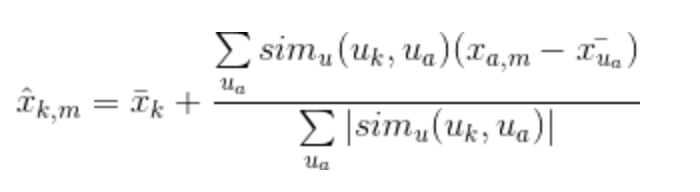

I considered the similarity between users *k* and *a* as weights that are multiplied by the ratings of a similar user *a* (corrected for the average rating of that user). The similarity was normalized so that the ratings stay between the range of 1 and 5 and, as a final step, the average ratings of the user that I am trying to predict was summed up. 

The main idea behind this computation is that some users may tend to always give high or low ratings to all movies. The relative difference in the ratings that these users give is more important than the absolute values. To illustrate: user *k* gives 4 stars to his favourite movies and 3 stars to all other good movies. Suppose now that another user *t* rates movies that he/she likes with 5 stars, and the movies he/she found boring with 3 stars. These two users could have a very similar taste but treat the rating system differently. 

In item-based collaborative filtering the query user is specified for the prediction, there is no need to correct for users average rating. So we rather use the formular below:

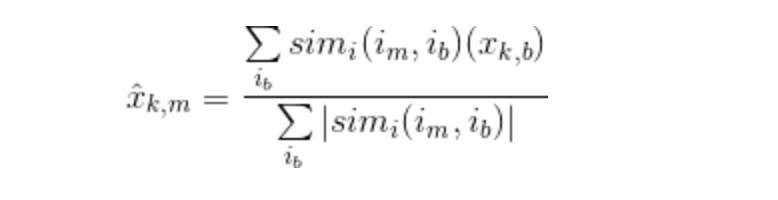

In [32]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #np.newaxis used to enable mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [33]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

### Evaluation
There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is *Root Mean Squared Error (RMSE)*. RMSE has the benefit of penalizing large errors more so can be more appropriate. It also avoids the use of taking the absolute value.
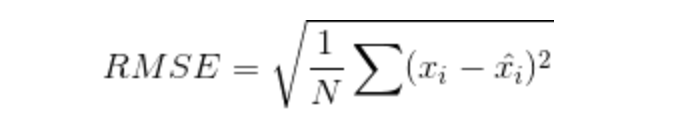

Since I only want to consider predicted ratings that are in the test dataset, I filter out all other elements in the prediction matrix with `prediction[ground_truth.nonzero()]`. 

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [35]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.1186089986455725
Item-based CF RMSE: 3.4477348580944858


Memory-based algorithms are easy to implement and produce reasonable prediction quality. The drawback of memory-based CF is that it doesn't scale to real-world scenarios, they are not scalable that is they don't scale well new user or new item enters the system. Model-based CF methods are scalable and can deal with higher sparsity level than memory-based models, though they don't perform well when new users or items that don't have any ratings enter the system. 



# Model-based Collaborative Filtering

Model-based Collaborative Filtering is based on **Matrix Factorization (MF)** which has received greater exposure, mainly as an unsupervised learning method for latent variable decomposition and dimensionality reduction. Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF. The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items. 
When there is a very sparse matrix, with a lot of dimensions, by doing matrix factorization someone can restructure the  user-item matrix into low-rank structure, and the matrix can be represented by the multiplication of two low-rank matrices, where the rows contain the latent vector. This matrix fit to approximate the original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.

Calculate the sparsity level of MovieLens dataset below:

In [36]:
# the result implies that 93.7% of its cells are either not filled with data or are zeros.
sparsity=round(1.0-len(df)/float(n_users*n_items),3)
print('The sparsity level of MovieLens100K is ' +  str(sparsity*100) + '%')

The sparsity level of MovieLens100K is 93.7%


### SVD
A popular matrix factorization method is **Singular value decomposition (SVD)**. Collaborative Filtering can be formulated by approximating a matrix `X` by using singular value decomposition. 
The general equation is below:

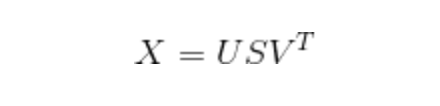

Given `m x n` matrix `X`:
* *`U`* is an *`(m x r)`* orthogonal matrix
* *`S`* is an *`(r x r)`* diagonal matrix with non-negative real numbers on the diagonal
* *V^T* is an *`(r x n)`* orthogonal matrix

Elements on the diagonal in `S` are known as *singular values of `X`*. 


Matrix *`X`* can be factorized to *`U`*, *`S`* and *`V`*. The *`U`* matrix represents the feature vectors corresponding to the users in the hidden feature space and the *`V`* matrix represents the feature vectors corresponding to the items in the hidden feature space.

Now I can make a prediction by taking dot product of *`U`*, *`S`* and *`V^T`*.


In [37]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

# obtain SVD components from train matrix. select k.
u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.7159630097814498
